In [42]:
from keras.layers import Input, Dense, Conv2D, Activation, Dropout,BatchNormalization
from keras.models import Model
from keras import backend as K
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.models import Model
from keras.optimizers import RMSprop, adam
from keras import metrics
from matplotlib import pyplot as plt
import keras
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
from keras.callbacks import TensorBoard
#%matplotlib inline
from keras.models import Sequential
from keras import metrics
from sklearn.metrics import mutual_info_score



In [43]:
config = tf.ConfigProto() 
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
keras.backend.set_session(session)

In [ ]:
data = pd.read_csv("Livertable.csv")

In [ ]:
np.shape(data)

In [2]:
b =  range(473)

In [47]:
data = data[data.columns[1:]].as_matrix()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [48]:
pd.DataFrame(data[0:10,1:10])
data = data[0:, 1:]
np.max(data)
data = data /51

In [49]:
np.max(data)

1.0

In [50]:

inputs = data[:,:]
print(np.shape(inputs))
inputs = inputs.astype('float32')
patients = inputs[:,:] 
patients1 = inputs[:,:]
X_train, X_test,y,y = train_test_split(inputs,b,test_size=0.2 , random_state=42)

print("X_train shape : ",np.shape(X_train))
print("x_test shape : ",np.shape(X_test))
print("patients shape : ",np.shape(patients))


(473, 15856)
X_train shape :  (378, 15856)
x_test shape :  (95, 15856)
patients shape :  (473, 15856)


In [ ]:
X_train.shape

In [52]:
X_train =np.reshape(X_train, [-1, 1, 20159])
X_test = np.reshape(X_test ,[-1, 1, 20159])
patients = np.reshape(patients ,[-1, 1, 20159])

print("X_train shape : ",np.shape(X_train))
print("x_test shape : ",np.shape(X_test))
print("patients shape : ",np.shape(patients))
#print(X_train)

X_train shape :  (378, 1, 15856)
x_test shape :  (95, 1, 15856)
patients shape :  (473, 1, 15856)


In [62]:
input = Input(shape = (1, 20159))


x = Dense(1000,kernel_initializer='glorot_uniform', activation = 'relu')(input)
x = BatchNormalization()(x)
bottleneck = Dense(3, kernel_initializer='glorot_uniform', activation = 'relu', name='bottleneck')(x)
x = Dense(3, kernel_initializer='glorot_uniform', activation = 'relu')(bottleneck)
x = Dense(1000, kernel_initializer='glorot_uniform', activation = 'relu')(x)
x = BatchNormalization()(x)
out = Dense(20159, kernel_initializer='glorot_uniform', activation='sigmoid')(x)


model = Model(input, out)

In [63]:
adam = keras.optimizers.Adam(lr=0.00005)
sgd = keras.optimizers.SGD(lr=0.005,decay=10e-6,momentum=0.9, nesterov=1)
model.compile(optimizer=adam,
              loss='mse')

In [64]:
model.summary()

In [65]:
earlyStopping =keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='auto')
autoencoder_train = model.fit(X_train,X_train,epochs=10000,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test), callbacks=[earlyStopping])




Train on 378 samples, validate on 95 samples
Epoch 1/10000
378/378 [==============================] - 2s 6ms/step - loss: 0.2249 - val_loss: 0.2256
Epoch 2/10000
378/378 [==============================] - 0s 950us/step - loss: 0.2245 - val_loss: 0.2254
Epoch 3/10000
378/378 [==============================] - 0s 986us/step - loss: 0.2243 - val_loss: 0.2253
Epoch 4/10000
378/378 [==============================] - 0s 979us/step - loss: 0.2242 - val_loss: 0.2252
Epoch 5/10000
378/378 [==============================] - 0s 972us/step - loss: 0.2240 - val_loss: 0.2250
Epoch 6/10000
378/378 [==============================] - 0s 990us/step - loss: 0.2238 - val_loss: 0.2248
Epoch 7/10000
378/378 [==============================] - 0s 964us/step - loss: 0.2235 - val_loss: 0.2245
Epoch 8/10000
378/378 [==============================] - 0s 963us/step - loss: 0.2232 - val_loss: 0.2242
Epoch 9/10000
378/378 [==============================] - 0s 970us/step - loss: 0.2229 - val_loss: 0.2237
Epoch 10/100

Epoch 78/10000
378/378 [==============================] - 0s 960us/step - loss: 0.0145 - val_loss: 0.0144
Epoch 79/10000
378/378 [==============================] - 0s 975us/step - loss: 0.0139 - val_loss: 0.0138
Epoch 80/10000
378/378 [==============================] - 0s 967us/step - loss: 0.0133 - val_loss: 0.0132
Epoch 81/10000
378/378 [==============================] - 0s 942us/step - loss: 0.0127 - val_loss: 0.0127
Epoch 82/10000
378/378 [==============================] - 0s 982us/step - loss: 0.0122 - val_loss: 0.0122
Epoch 83/10000
378/378 [==============================] - 0s 974us/step - loss: 0.0117 - val_loss: 0.0117
Epoch 84/10000
378/378 [==============================] - 0s 987us/step - loss: 0.0112 - val_loss: 0.0113
Epoch 85/10000
378/378 [==============================] - 0s 952us/step - loss: 0.0108 - val_loss: 0.0108
Epoch 86/10000
378/378 [==============================] - 0s 906us/step - loss: 0.0104 - val_loss: 0.0104
Epoch 87/10000
378/378 [======================

Epoch 155/10000
378/378 [==============================] - 0s 954us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 156/10000
378/378 [==============================] - 0s 983us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 157/10000
378/378 [==============================] - 0s 995us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 158/10000
378/378 [==============================] - 0s 970us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 159/10000
378/378 [==============================] - 0s 979us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 160/10000
378/378 [==============================] - 0s 991us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 161/10000
378/378 [==============================] - 0s 952us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 162/10000
378/378 [==============================] - 0s 979us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 163/10000
378/378 [==============================] - 0s 983us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 164/10000
378/378 [============

378/378 [==============================] - 0s 980us/step - loss: 4.9705e-04 - val_loss: 4.9713e-04
Epoch 300/10000
378/378 [==============================] - 0s 970us/step - loss: 4.9577e-04 - val_loss: 4.9577e-04
Epoch 301/10000
378/378 [==============================] - 0s 960us/step - loss: 4.9462e-04 - val_loss: 4.9432e-04
Epoch 302/10000
378/378 [==============================] - 0s 966us/step - loss: 4.9340e-04 - val_loss: 4.9294e-04
Epoch 303/10000
378/378 [==============================] - 0s 987us/step - loss: 4.9225e-04 - val_loss: 4.9155e-04
Epoch 304/10000
378/378 [==============================] - 0s 958us/step - loss: 4.9107e-04 - val_loss: 4.9025e-04
Epoch 305/10000
378/378 [==============================] - 0s 982us/step - loss: 4.9000e-04 - val_loss: 4.8890e-04
Epoch 306/10000
378/378 [==============================] - 0s 945us/step - loss: 4.8895e-04 - val_loss: 4.8752e-04
Epoch 307/10000
378/378 [==============================] - 0s 974us/step - loss: 4.8776e-04 - va

378/378 [==============================] - 0s 940us/step - loss: 4.3747e-04 - val_loss: 4.2129e-04
Epoch 442/10000
378/378 [==============================] - 0s 935us/step - loss: 4.3740e-04 - val_loss: 4.2117e-04
Epoch 443/10000
378/378 [==============================] - 0s 954us/step - loss: 4.3732e-04 - val_loss: 4.2109e-04
Epoch 444/10000
378/378 [==============================] - 0s 977us/step - loss: 4.3726e-04 - val_loss: 4.2099e-04
Epoch 445/10000
378/378 [==============================] - 0s 991us/step - loss: 4.3720e-04 - val_loss: 4.2087e-04
Epoch 446/10000
378/378 [==============================] - 0s 986us/step - loss: 4.3717e-04 - val_loss: 4.2070e-04
Epoch 447/10000
378/378 [==============================] - 0s 964us/step - loss: 4.3708e-04 - val_loss: 4.2058e-04
Epoch 448/10000
378/378 [==============================] - 0s 961us/step - loss: 4.3701e-04 - val_loss: 4.2048e-04
Epoch 449/10000
378/378 [==============================] - 0s 976us/step - loss: 4.3697e-04 - va

# Finding the best hyperparameters

In [15]:
loss = np.zeros((500,40))
val_loss = np.zeros((500,40))

for hid1Neurons in range (1, 5000, 10 ):
    for hid2Neurons in range (1,200,5):
        input = Input(shape = (1, 18977))
        x = Dense(hid1Neurons,kernel_initializer='glorot_uniform', activation = 'relu')(input)
        x = BatchNormalization()(x)
        #50 #70:0.0163 #100: 0.0167 #120:0.0171 #150: 0.0159 #5: 0.0201 #25:0.0257 #batchSize =15 , 500:0.0204
        bottleneck = Dense(hid2Neurons, kernel_initializer='glorot_uniform', activation = 'relu', name='bottleneck')(x) 
        ######################################################################################################
        x = Dense(hid2Neurons, kernel_initializer='glorot_uniform', activation = 'relu')(bottleneck)
        x = Dense(hid1Neurons, kernel_initializer='glorot_uniform', activation = 'relu')(x)
        x = BatchNormalization()(x)
        out = Dense(18977, kernel_initializer='glorot_uniform', activation='sigmoid')(x)
        model = Model(input, out)
        
        #######################################################################################################
        sgd = keras.optimizers.SGD(lr=0.005,decay=10e-6,momentum=0.9, nesterov=1)
        model.compile(optimizer=adam,
              loss='mse')
        #######################################################################################################
        earlyStopping =keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=6,
                              verbose=0, mode='auto')
        autoencoder_train = model.fit(X_train,X_train,epochs=10000,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test), callbacks=[earlyStopping])
        loss[hid1Neurons,hid2Neurons] = autoencoder_train.history['loss']
        val_loss[hid1Neurons,hid2Neurons] = autoencoder_train.history['val_loss']
        print("Number of neurons of 1st layer:{a},2d layer:{b}, Loss is:{c} ".format(a =hid1Neurons, b = hid2Neurons,
                                                                                    c =loss[hid1Neurons,hid2Neurons] ))
        print("Number of neurons of 1st layer:{a},2d layer:{b}, validation Loss is:{c} ".format(a =hid1Neurons, b = hid2Neurons,
                                                                                    c =val_loss[hid1Neurons,hid2Neurons] ))

Train on 411 samples, validate on 103 samples
Epoch 1/10000
411/411 [==============================] - 1s 2ms/step - loss: 0.2429 - val_loss: 0.2429
Epoch 2/10000
411/411 [==============================] - 0s 408us/step - loss: 0.2415 - val_loss: 0.2414
Epoch 3/10000
411/411 [==============================] - 0s 351us/step - loss: 0.2399 - val_loss: 0.2398
Epoch 4/10000
411/411 [==============================] - 0s 339us/step - loss: 0.2384 - val_loss: 0.2382
Epoch 5/10000
411/411 [==============================] - 0s 414us/step - loss: 0.2368 - val_loss: 0.2367
Epoch 6/10000
411/411 [==============================] - 0s 427us/step - loss: 0.2352 - val_loss: 0.2350
Epoch 7/10000
411/411 [==============================] - 0s 474us/step - loss: 0.2336 - val_loss: 0.2334
Epoch 8/10000
411/411 [==============================] - 0s 428us/step - loss: 0.2319 - val_loss: 0.2317
Epoch 9/10000
411/411 [==============================] - 0s 409us/step - loss: 0.2302 - val_loss: 0.2300
Epoch 10/10

Epoch 78/10000
411/411 [==============================] - 0s 421us/step - loss: 0.0788 - val_loss: 0.0784
Epoch 79/10000
411/411 [==============================] - 0s 414us/step - loss: 0.0772 - val_loss: 0.0768
Epoch 80/10000
411/411 [==============================] - 0s 449us/step - loss: 0.0756 - val_loss: 0.0752
Epoch 81/10000
411/411 [==============================] - 0s 388us/step - loss: 0.0741 - val_loss: 0.0736
Epoch 82/10000
411/411 [==============================] - 0s 348us/step - loss: 0.0725 - val_loss: 0.0721
Epoch 83/10000
411/411 [==============================] - 0s 399us/step - loss: 0.0710 - val_loss: 0.0706
Epoch 84/10000
411/411 [==============================] - 0s 385us/step - loss: 0.0696 - val_loss: 0.0692
Epoch 85/10000
411/411 [==============================] - 0s 375us/step - loss: 0.0681 - val_loss: 0.0677
Epoch 86/10000
411/411 [==============================] - 0s 417us/step - loss: 0.0667 - val_loss: 0.0663
Epoch 87/10000
411/411 [======================

Epoch 155/10000
411/411 [==============================] - 0s 437us/step - loss: 0.0175 - val_loss: 0.0176
Epoch 156/10000
411/411 [==============================] - 0s 389us/step - loss: 0.0172 - val_loss: 0.0173
Epoch 157/10000
411/411 [==============================] - 0s 355us/step - loss: 0.0169 - val_loss: 0.0170
Epoch 158/10000
411/411 [==============================] - 0s 369us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 159/10000
411/411 [==============================] - 0s 372us/step - loss: 0.0164 - val_loss: 0.0164
Epoch 160/10000
411/411 [==============================] - 0s 394us/step - loss: 0.0161 - val_loss: 0.0162
Epoch 161/10000
411/411 [==============================] - 0s 432us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 162/10000
411/411 [==============================] - 0s 423us/step - loss: 0.0156 - val_loss: 0.0157
Epoch 163/10000
411/411 [==============================] - 0s 359us/step - loss: 0.0154 - val_loss: 0.0154
Epoch 164/10000
411/411 [============

KeyboardInterrupt: 

# Plotting Losses ( Validation and training ) 

In [66]:

epochs = 
loss = autoencoder_train.history['loss']
np.shape(loss)

(579,)

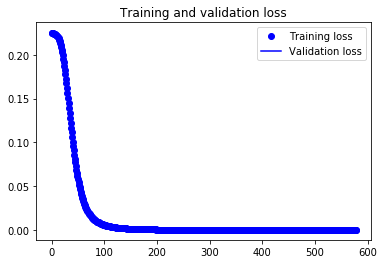

In [67]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Feature extraction 

In [68]:
m2 = Model(inputs=model.input, outputs=model.get_layer('bottleneck').output)
Y = m2.predict(patients)
Y =np.reshape(Y , (473, 3))
df = pd.DataFrame(Y)
df.to_csv("3CNV.csv",index = False)

In [70]:
p=pd.read_csv("3CNV.csv")
np.shape(p)
pd.DataFrame(p)
#p1 = pd.read_csv("500features.csv")
#mean_squared_error(y_true= p , y_pred= p1)

,0,1,2
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,2.405365,0.969846,4.181699
3,6.177290,2.310748,10.639936
4,6.221000,2.593643,10.387173
5,2.393581,1.054199,4.238043
6,2.480137,1.004355,4.121332
7,2.377229,1.017424,4.137586
8,2.518858,0.913558,4.099765
9,2.432282,0.971981,4.137338
